In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Elevate Lab/Day 6/archive/customer_churn_dataset-testing-master.csv')

In [ ]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,? 598.00,9.0,1.0
1,2.0,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,? 584.00,20.0,0.0
2,3.0,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,? 757.00,21.0,0.0
3,4.0,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,? 232.00,18.0,0.0
4,5.0,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,? 533.00,18.0,0.0


In [ ]:
df.dtypes

,0
CustomerID,float64
Age,float64
Gender,object
Tenure,float64
Usage Frequency,float64
Support Calls,float64
Payment Delay,float64
Subscription Type,object
Contract Length,object
Total Spend,object


In [ ]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [ ]:
df['Total Spend'] = df['Total Spend'].str.replace(r'[^0-9.]', '', regex=True)
df['Total Spend'] = pd.to_numeric(df['Total Spend'], errors='coerce')
df['Total Spend'] = df['Total Spend'].astype('Int64')

In [ ]:
df.dtypes

,0
CustomerID,int64
Age,float64
Gender,object
Tenure,float64
Usage Frequency,float64
Support Calls,float64
Payment Delay,float64
Subscription Type,object
Contract Length,object
Total Spend,Int64


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [ ]:
dupli = df.duplicated().sum()
print(dupli)

0


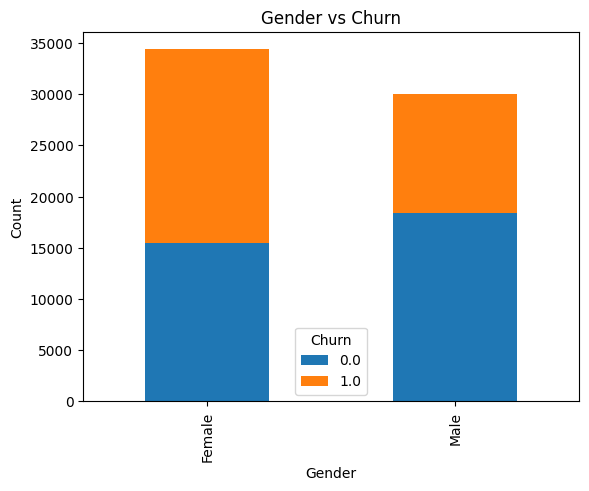

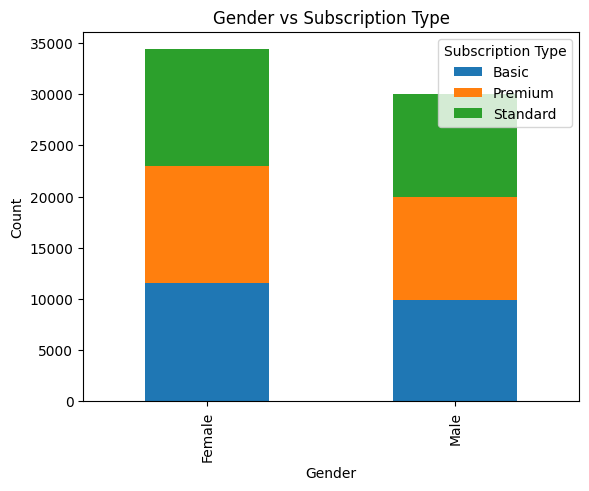

Text(0, 0.5, 'Count')

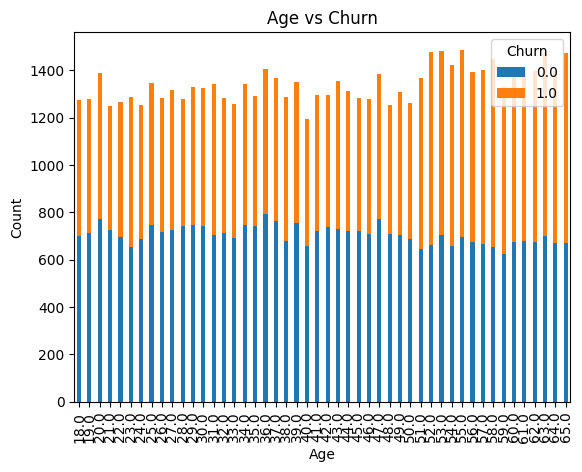

In [ ]:
#In-Depth Analysis for Gender vs Churn
gender_churn = df.groupby(['Gender', 'Churn']).size().unstack()
gender_churn.plot(kind='bar', stacked=True)
plt.title('Gender vs Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#Gender vs Subscription type
gender_subscription = df.groupby(['Gender', 'Subscription Type']).size().unstack()
gender_subscription.plot(kind='bar', stacked=True)
plt.title('Gender vs Subscription Type')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#Age vs Churn Customers
age_churn = df.groupby(['Age', 'Churn']).size().unstack()
age_churn.plot(kind='bar', width=0.4, stacked=True)
plt.title('Age vs Churn')
plt.xlabel('Age')
plt.ylabel('Count')

In [ ]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598,9.0,1.0
1,2,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584,20.0,0.0
2,3,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757,21.0,0.0
3,4,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232,18.0,0.0
4,5,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533,18.0,0.0


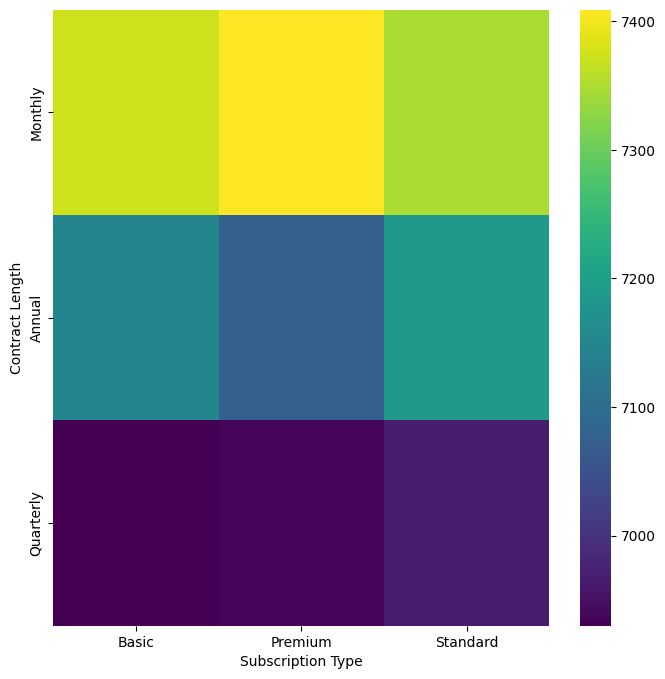

In [ ]:
#Subscription Type vs Contract Length

import seaborn as sns
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({x_label: grp['Contract Length'].value_counts() for x_label, grp in df.groupby('Subscription Type')})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Subscription Type')
_ = plt.ylabel('Contract Length')

## **Key Performance Indicators (KPIs)**

In [ ]:
#Churn Rate
Churned_cus = df['Churn'].sum()
Total_cus = len(df['Churn'])

Churn_rate = (Churned_cus/Total_cus)*100
print(f'The Churn rate of the customers is {Churn_rate}')

#Retention Rate
Retention_rate = 100 - Churn_rate
print(f'The Retention rate of the customers is {Retention_rate}')

#Average customer life time value
Avg_age = round(df['Age'].mean(), 0)
print(f'The average age of the customers is {Avg_age}')

#Average Churn Age
p = df[df['Churn'] == 1]
Avg_age_churn = round(p['Age'].mean(), 0)
print(f'The average age of the churned customers is {Avg_age_churn}')

# Gender getting churn more frequently
m = p['Gender'].value_counts().get('Male', 0)
f = p['Gender'].value_counts().get('Female', 0)

if m > f:
    print('Male customers are more likely to churn')
else:
    print('Female customers are more likely to churn')


#Plan type for Customers that are more likely to get churn
Basic_cus = p['Subscription Type'].value_counts().get('Basic', 0)
Standard_cus = p['Subscription Type'].value_counts().get('Standard', 0)
Premium_cus = p['Subscription Type'].value_counts().get('Premium', 0)

if Basic_cus > Standard_cus and Basic_cus > Premium_cus:
    print('Basic customers are more likely to churn')
elif Standard_cus > Basic_cus and Standard_cus > Premium_cus:
    print('Standard customers are more likely to churn')
elif Premium_cus > Basic_cus and Premium_cus > Standard_cus:
    print('Premium customers are more likely to churn')
else:
    print('No clear winner')

The Churn rate of the customers is 47.368502811694164
The Retention rate of the customers is 52.631497188305836
The average age of the customers is 42.0
The average age of the churned customers is 43.0
Female customers are more likely to churn
Basic customers are more likely to churn


# Insights for the development of strategies.

*   It can be seen that customers that are female with age of 43 Years are more likely to get churn on the basis of the given data.

*   Average age of customers is 42 Years.

Strategical developement should more focus on female customers with age of 43 Years having Basic Subscription


